In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.decomposition import PCA
df = pd.read_csv("USArrests.csv",index_col = 0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [2]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
sc1 = MinMaxScaler(clip=True,feature_range=(0,1)).set_output(transform="pandas")
df1 = sc1.fit_transform(df)
df1.head()

,Murder,Assault,UrbanPop,Rape
Alabama,0.746988,0.654110,0.440678,0.359173
Alaska,0.554217,0.746575,0.271186,0.961240
Arizona,0.439759,0.852740,0.813559,0.612403
Arkansas,0.481928,0.496575,0.305085,0.315245
California,0.493976,0.791096,1.000000,0.860465


In [6]:
kmeans = KMeans(n_clusters=4,n_init=10,random_state=17).fit(df1)
kmeans.get_params()

c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [7]:
kmeans.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [8]:
kmeans.inertia_

3.683456153585914

In [9]:
ssd = []
K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters=k,random_state=17,n_init=10).fit(df1)
    ssd.append(kmeans.inertia_)

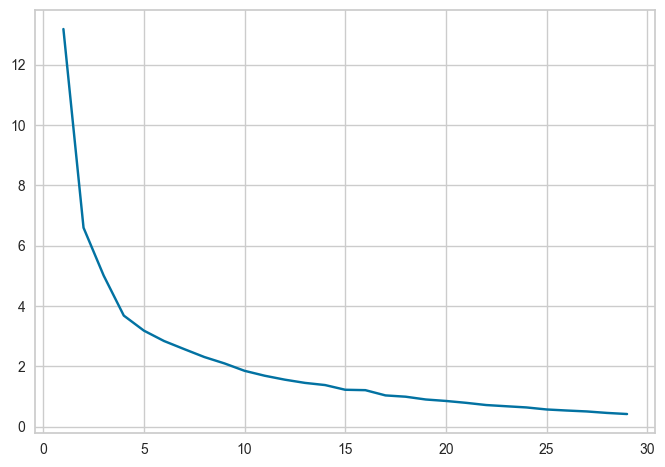

In [10]:
plt.plot(K,ssd,"bx-")
plt.show()

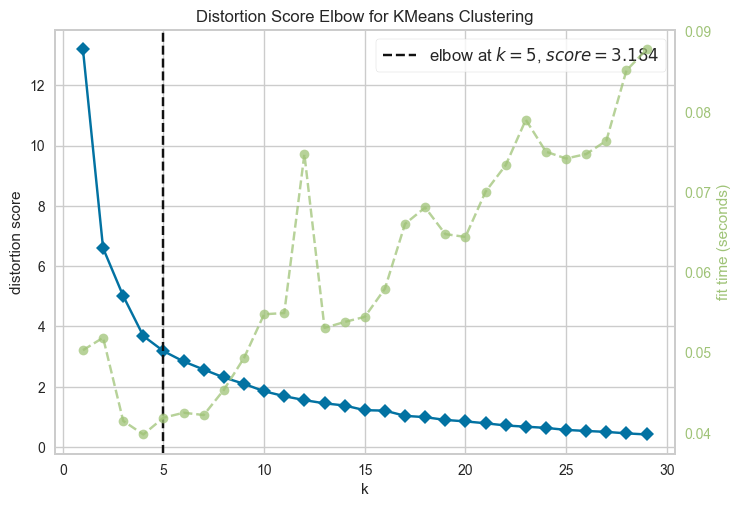

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
kmeans = KMeans(n_init=10,random_state=17)
elbow = KElbowVisualizer(kmeans,k=(1,30))
elbow.fit(df1)
elbow.show()

c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.42364457559625074
For n_clusters = 3 The average silhouette_score is : 0.3187755079997931
For n_clusters = 4 The average silhouette_score is : 0.34089035600743633


c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.30076261721222347
For n_clusters = 6 The average silhouette_score is : 0.2918285820526902


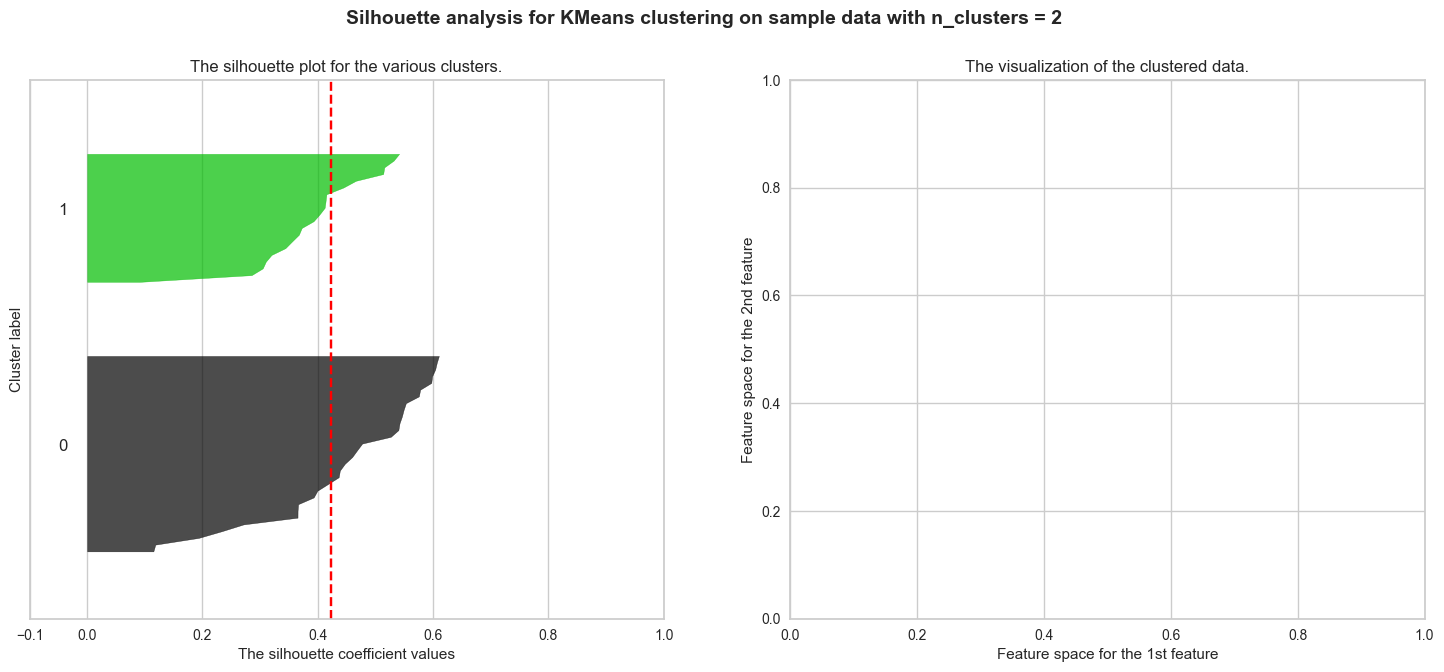

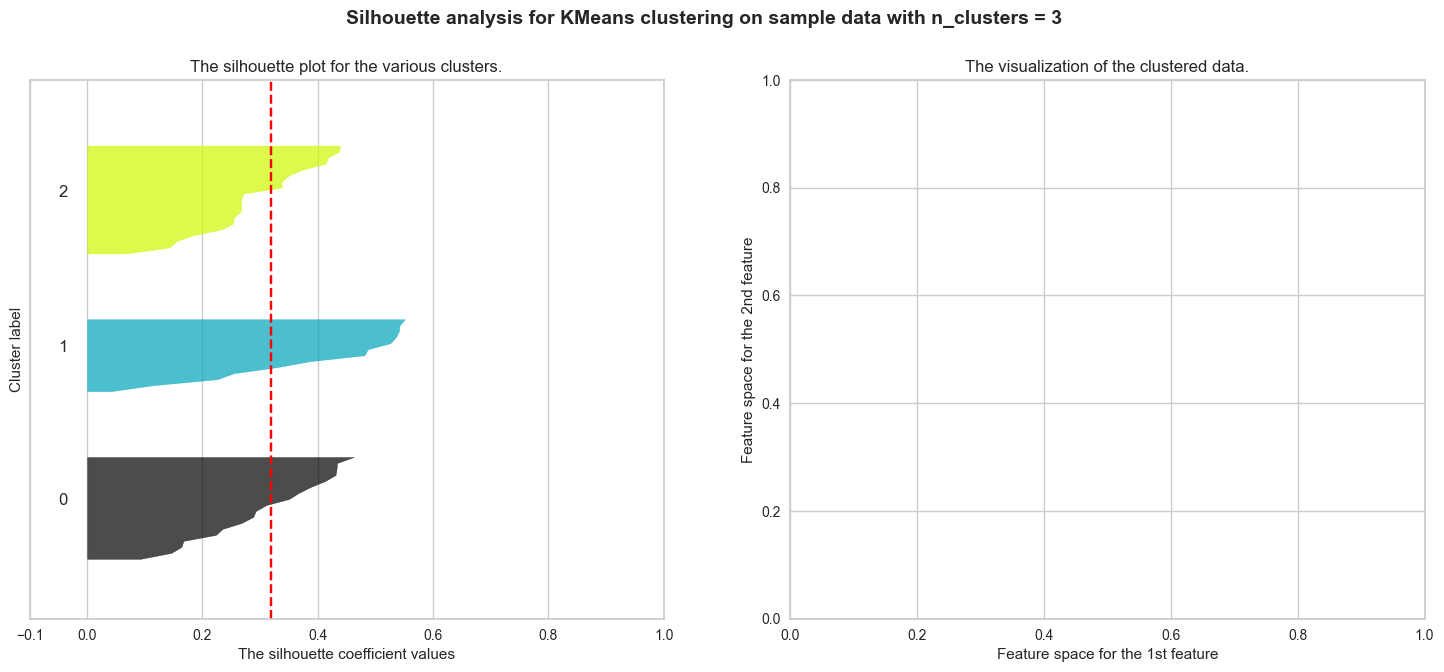

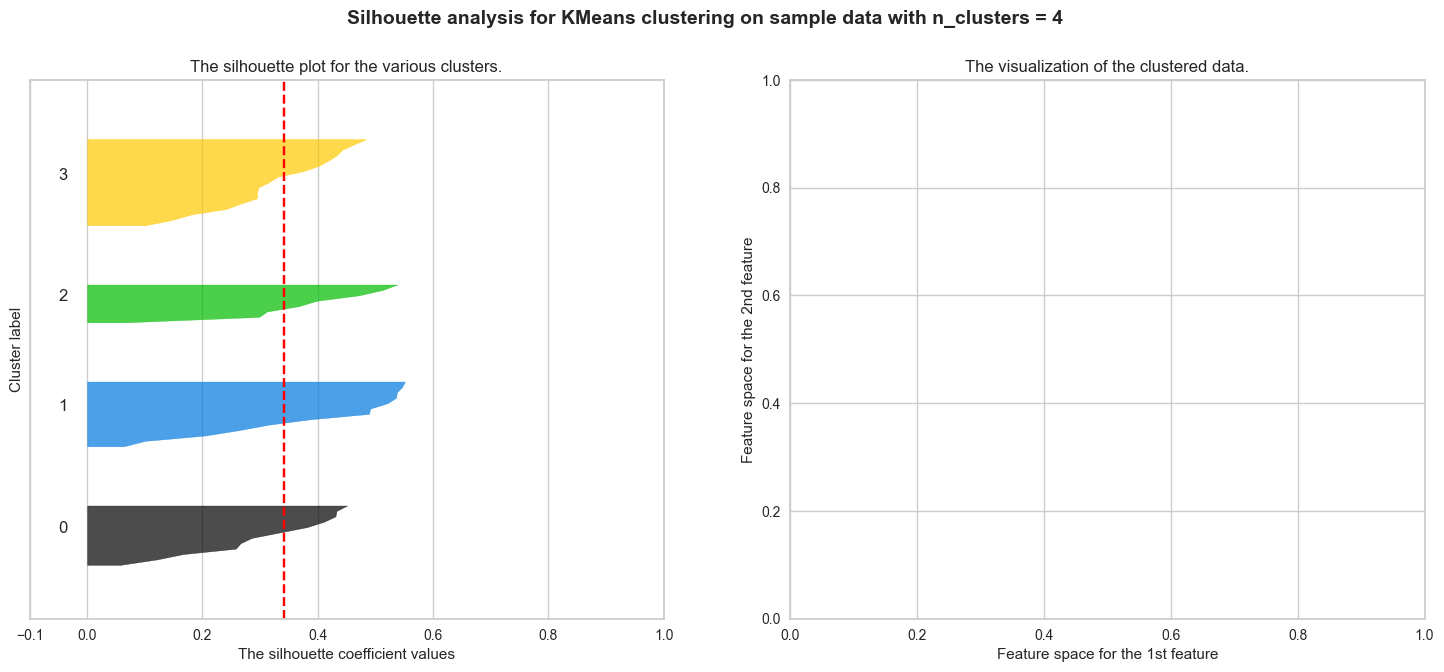

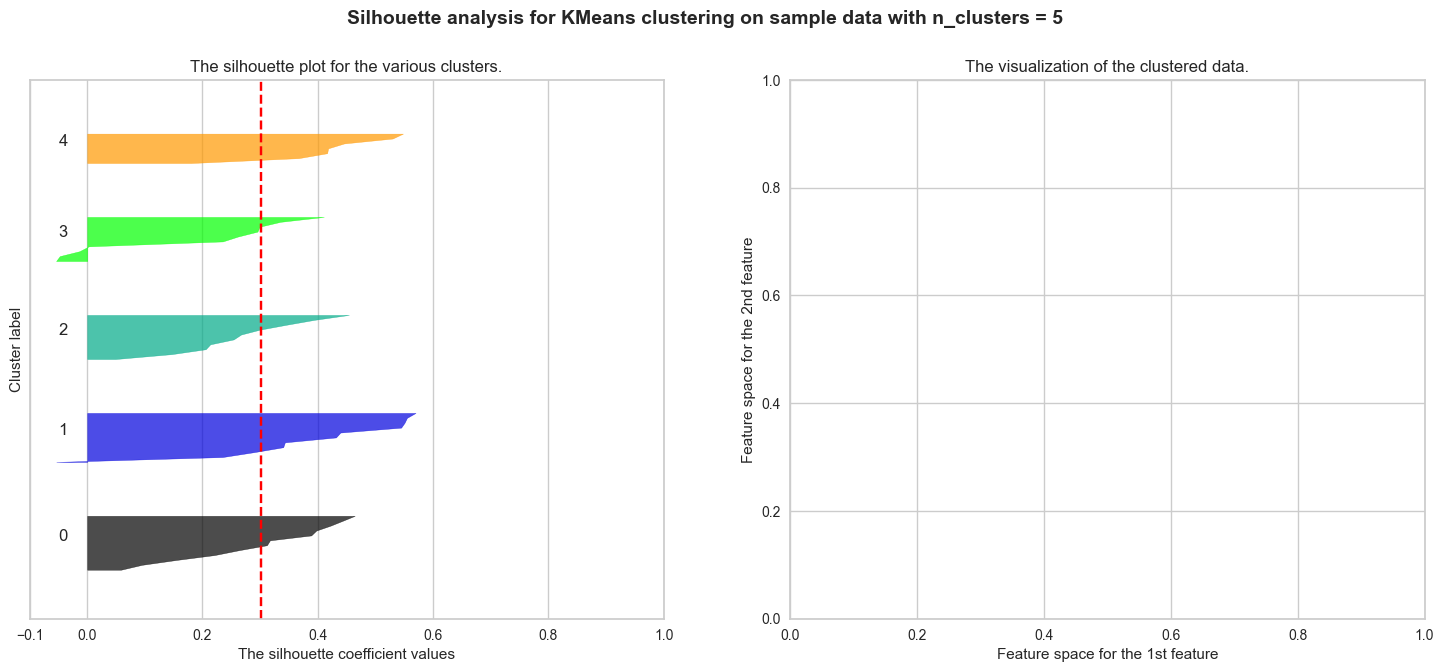

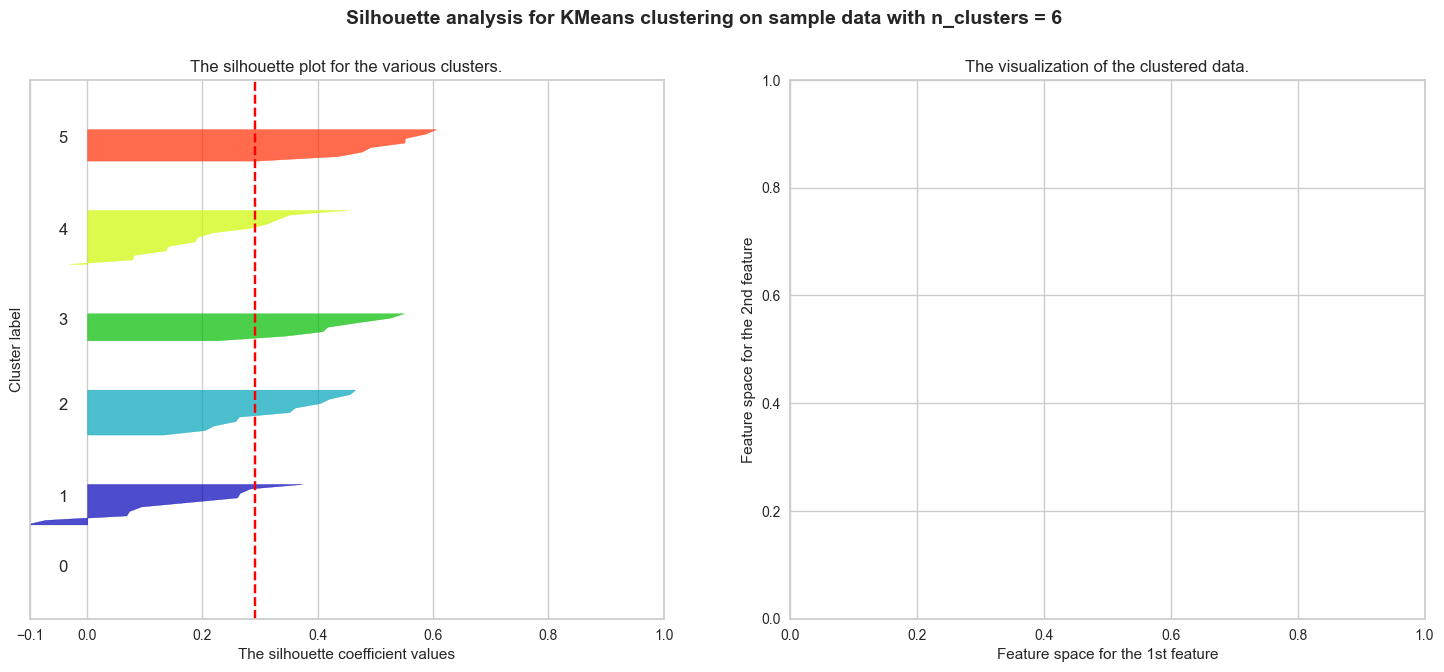

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]
X = df1.copy()

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
   

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [13]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

eps_values = np.arange(0.1, 1, 0.1)
min_samples_values = range(2, 10)

best_eps = None
best_min_samples = None
best_silhouette = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X)

        # Gürültüyü (etiketi -1 olan veri noktaları) hariç tutarak silhouette_score hesapla
        core_samples_mask = clusters != -1
        labels = clusters[core_samples_mask]
        X_core = X[core_samples_mask]

        if len(set(labels)) > 1:
            score = silhouette_score(X_core, labels)
            if score > best_silhouette:
                best_eps = eps
                best_min_samples = min_samples
                best_silhouette = score

print(f"Best eps: {best_eps}, best min_samples: {best_min_samples}, best silhouette score: {best_silhouette}")


Best eps: 0.1, best min_samples: 2, best silhouette score: 0.934062621226878


In [14]:
dbscan = DBSCAN(eps=0.1, min_samples=2)
clusters = dbscan.fit_predict(df1)

clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [15]:
elbow.elbow_value_

5

In [18]:
kmeans = KMeans(n_clusters=5,n_init=10,random_state=17).fit(df1)
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 5,
 'n_init': 10,
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [19]:
kmeans.labels_

array([3, 1, 1, 4, 1, 1, 2, 4, 1, 3, 2, 0, 1, 4, 0, 4, 4, 3, 0, 1, 2, 1,
       0, 3, 4, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 4, 4, 2, 2, 3, 0, 3, 1, 2,
       0, 4, 2, 0, 0, 4])

In [22]:
df["clusters"] = kmeans.labels_
df["clusters"] = df["clusters"] +1
df.head()

,Murder,Assault,UrbanPop,Rape,clusters
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,5
California,9.0,276,91,40.6,2


In [23]:
df.loc[df["clusters"]==5]

,Murder,Assault,UrbanPop,Rape,clusters
Arkansas,8.8,190,50,19.5,5
Delaware,5.9,238,72,15.8,5
Indiana,7.2,113,65,21.0,5
Kansas,6.0,115,66,18.0,5
Kentucky,9.7,109,52,16.3,5
Missouri,9.0,178,70,28.2,5
Oklahoma,6.6,151,68,20.0,5
Oregon,4.9,159,67,29.3,5
Virginia,8.5,156,63,20.7,5
Wyoming,6.8,161,60,15.6,5


In [27]:
df.loc[df["clusters"]==1]

,Murder,Assault,UrbanPop,Rape,clusters
Idaho,2.6,120,54,14.2,1
Iowa,2.2,56,57,11.3,1
Maine,2.1,83,51,7.8,1
Minnesota,2.7,72,66,14.9,1
Montana,6.0,109,53,16.4,1
Nebraska,4.3,102,62,16.5,1
New Hampshire,2.1,57,56,9.5,1
North Dakota,0.8,45,44,7.3,1
South Dakota,3.8,86,45,12.8,1
Vermont,2.2,48,32,11.2,1


In [29]:
df.groupby("clusters").agg(["mean","median","count"])

Murder                  Assault                UrbanPop         \
               mean median count        mean median count       mean median   
clusters                                                                      
1          3.091667    2.6    12   76.000000   76.5    12  52.083333   53.5   
2         10.966667   11.2    12  264.000000  259.0    12  76.500000   80.0   
3          4.955556    4.4     9  125.444444  120.0     9  80.111111   80.0   
4         14.671429   14.4     7  251.285714  249.0     7  54.285714   58.0   
5          7.340000    7.0    10  157.000000  157.5    10  63.300000   65.5   

                     Rape               
         count       mean median count  
clusters                                
1           12  11.833333  11.25    12  
2           12  33.608333  32.00    12  
3            9  17.788889  18.80     9  
4            7  21.685714  22.20     7  
5           10  20.440000  19.75    10

In [30]:
df.to_csv("clusters.csv")

In [31]:
df = pd.read_csv("USArrests.csv",index_col = 0)
sc1 = MinMaxScaler(clip=True,feature_range=(0,1)).set_output(transform="pandas")
df1 = sc1.fit_transform(df)
df1.head()

,Murder,Assault,UrbanPop,Rape
Alabama,0.746988,0.654110,0.440678,0.359173
Alaska,0.554217,0.746575,0.271186,0.961240
Arizona,0.439759,0.852740,0.813559,0.612403
Arkansas,0.481928,0.496575,0.305085,0.315245
California,0.493976,0.791096,1.000000,0.860465


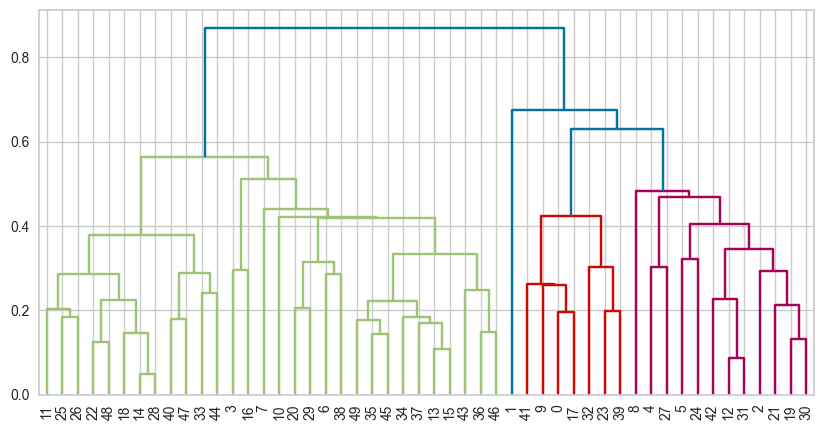

In [35]:
hc_average = linkage(df1,"average")
plt.figure(figsize=(10,5))
dendrogram(hc_average,leaf_font_size=10)
plt.show()

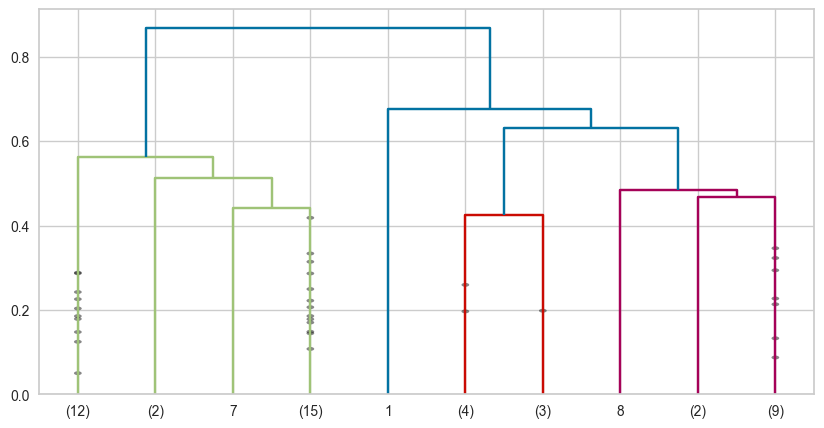

In [40]:
hc_average = linkage(df1,"average")
plt.figure(figsize=(10,5))
dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

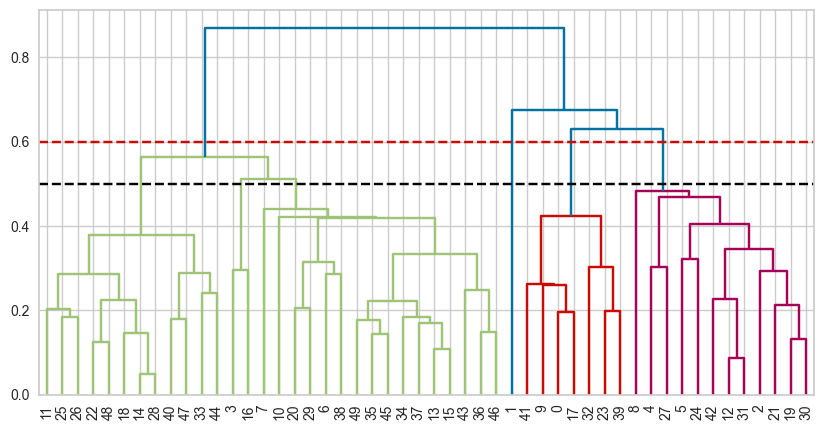

In [43]:
hc_average = linkage(df1,"average")
plt.figure(figsize=(10,5))
dend=dendrogram(hc_average,
           leaf_font_size=10)
plt.axhline(y=0.6,color="r",linestyle="--")
plt.axhline(y=0.5,color="black",linestyle="--")

plt.show()

In [44]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters =5,linkage="average")
clusters=cluster.fit_predict(df1)
clusters

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 4, 1, 0, 4, 0, 0, 3, 4, 1, 0, 1,
       4, 3, 1, 4, 4, 1, 4, 0, 1, 1, 3, 4, 0, 0, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 0, 0, 4, 4, 0], dtype=int64)

In [48]:
df["hi_clusters"] = clusters +1
df["k_means_clusters"] = kmeans.labels_+1
df.head()

,Murder,Assault,UrbanPop,Rape,hi_clusters,k_means_clusters
Alabama,13.2,236,58,21.2,4,4
Alaska,10.0,263,48,44.5,3,2
Arizona,8.1,294,80,31.0,2,2
Arkansas,8.8,190,50,19.5,1,5
California,9.0,276,91,40.6,2,2


Optimal number of clusters: 3


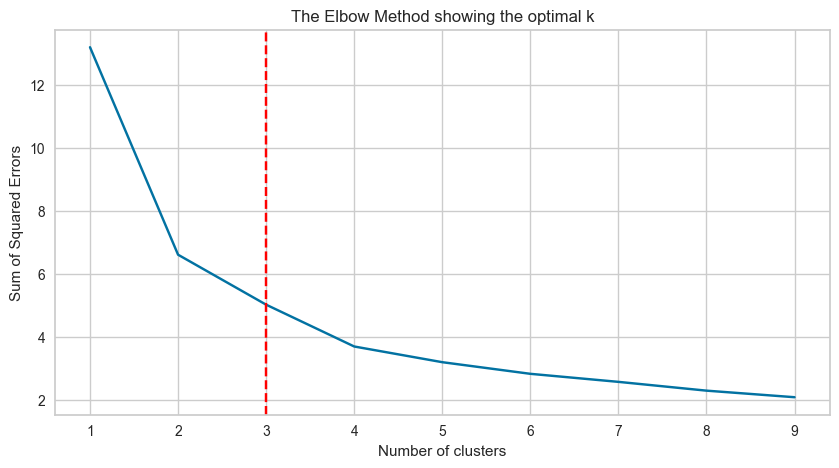

In [52]:
from kneed import KneeLocator
sse = []  # Sum of Squared Errors listesi
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k,n_init=10)
    km = km.fit(df1)
    sse.append(km.inertia_)

# Dirsek noktasını belirleme
kl = KneeLocator(K, sse, curve="convex", direction="decreasing")
print(f"Optimal number of clusters: {kl.elbow}")

# Sonuçları görselleştirme
plt.figure(figsize=(10,5))
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors')
plt.title('The Elbow Method showing the optimal k')
plt.axvline(x=kl.elbow, color='red', linestyle='--')
plt.show()